% ロジスティック回帰モデル・・・データの確率分布は二項分布、リンク関数はロジット関数

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
% precision 3
% matplotlib inline

In [2]:
test_result = pd.read_csv("./data/6-3-1-logistic-regression.csv")
print(test_result)

    hours  result
0       0       0
1       0       0
2       0       0
3       0       0
4       0       0
5       0       0
6       0       0
7       0       0
8       0       0
9       0       0
10      1       0
11      1       0
12      1       0
13      1       0
14      1       0
15      1       0
16      1       0
17      1       0
18      1       0
19      1       0
20      2       0
21      2       1
22      2       0
23      2       0
24      2       0
25      2       0
26      2       0
27      2       0
28      2       0
29      2       0
..    ...     ...
70      7       0
71      7       1
72      7       1
73      7       1
74      7       1
75      7       1
76      7       0
77      7       1
78      7       1
79      7       1
80      8       1
81      8       1
82      8       1
83      8       1
84      8       1
85      8       1
86      8       1
87      8       0
88      8       1
89      8       1
90      9       1
91      9       1
92      9       1
93      9 

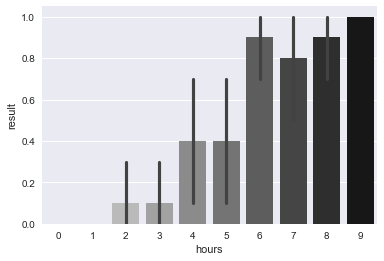

In [3]:
sns.barplot(x="hours", y="result", data=test_result, palette="gray_r")
#  縦軸合格者の平均値＝合格率

In [4]:
print(test_result.groupby("hours").mean())

       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


In [5]:
# ロジスティック回帰モデル
mod_glm = smf.glm(formula="result ~ hours", data=test_result, family=sm.families.Binomial(link=sm.families.links.logit)).fit()

In [6]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Wed, 22 Aug 2018   Deviance:                       68.028
Time:                        20:05:05   Pearson chi2:                     84.9
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

In [7]:
# モデル選択（比較） AICによって判断

# NULLモデル
mod_glm_null = smf.glm("result ~ 1", data=test_result, family=sm.families.Binomial(link=sm.families.links.logit)).fit()

In [8]:
# NULLモデルと変数(hour)入りモデルの比較
print("Nullモデル :", mod_glm_null.aic.round(3))
print("変数入りモデル :", mod_glm.aic.round(3))

Nullモデル : 139.989
変数入りモデル : 72.028


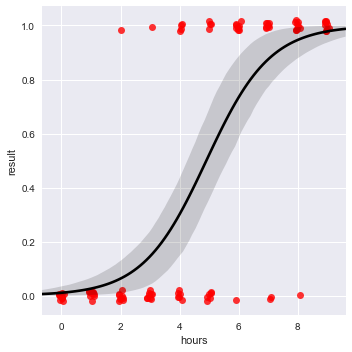

In [9]:
# 理論上の合格率（成功確率）を計算
sns.lmplot(x="hours", y="result", data=test_result, logistic=True, scatter_kws={"color": "red"}, line_kws={"color": "black"}, 
          x_jitter=0.1, y_jitter=0.02)

In [10]:
# 数値で合格率を計算
# 0-9まで1ずつ増える
exp_val = pd.DataFrame({"hours": np.arange(0, 10, 1)})
pred_prob = mod_glm.predict(exp_val)
pred_prob

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

In [11]:
# 合格者
pred_prob > 0.5

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
9     True
dtype: bool

In [12]:
# オッズ・・・失敗と比較して成功が何倍あるか
# オッズ= p / (1 - p)
# 対数オッズ = log(p / (1 - p)) = logit関数 logit(x) = log (x / (1 - x))
# xのアンダーフローをオッズに変換→無限大を回避する

In [13]:
# オッズ比・・・どっちが成功しやすいか

In [14]:
# ロジスティック回帰の係数とオッズ比の関係
# logit(p) = beta0 + beta1 * x
# logit(p1) = beta0 + beta1 * x
# logit(p2) = beta0 + beta1 * (1 + x)

# logit(p2) - logit(p1) = beta1 * 1
# log(p2 _odds) -  log(p1_odds) = log(p2_odds / p1_odds) = log( p2(1-p1) / p1(1-p2) ) = beta1 * 1
# p2_odds / p1_odds = exp(beta1)

# つまり、ロジスティック回帰係数＝説明変数が１だけ変化したときの対数オッズ比

In [15]:
# 勉強時間が1時間の合格率
exp_val_1 = pd.DataFrame({"hours": [1]})
pred_1 = mod_glm.predict(exp_val_1)

# 勉強時間が2時間の合格率
exp_val_2 = pd.DataFrame({"hours": [2]})
pred_2 = mod_glm.predict(exp_val_2)